In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


banco transitórios oscilatórios: 100% completo
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
[[0.70710678]
 [0.70710678]
 [0.70710678]
 [0.70710678]
 [0.70710678]
 [0.70710678]
 [0.70710678]
 [0.70710678]
 [0.76906897]
 [0.70710693]]
[[2.89107854e-14]
 [6.39314863e-14]
 [1.09200428e-13]
 [8.47564032e-14]
 [8.09973459e-14]
 [8.58525552e-14]
 [1.05885230e-13]
 [1.30066549e-13]
 [3.06762939e+01]
 [1.20755363e-04]]


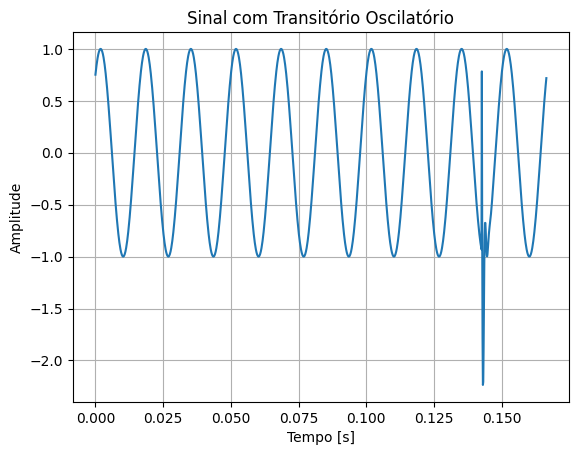

banco swell: 100% completo
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]
[[0.70710678]
 [0.70710678]
 [0.70710678]
 [0.70710678]
 [0.70710678]
 [0.70710678]
 [0.74317459]
 [1.25969193]
 [1.00907873]
 [0.70710678]]
[[3.64905775e-14]
 [6.82006489e-14]
 [1.10261791e-13]
 [8.72087785e-14]
 [1.14928623e-13]
 [9.26943765e-14]
 [1.49912696e+01]
 [1.33792511e-13]
 [1.96758471e+01]
 [2.03005192e-13]]


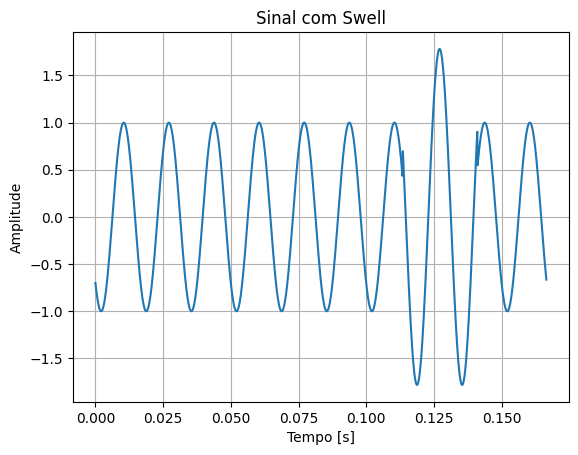

banco sag: 100% completo
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
[[0.70710678]
 [0.70710678]
 [0.70710678]
 [0.70710678]
 [0.65531141]
 [0.28791459]
 [0.39088538]
 [0.70710678]
 [0.70710678]
 [0.70710678]]
[[3.54945287e-14]
 [6.61507224e-14]
 [1.05852770e-13]
 [8.03871648e-14]
 [1.98150341e+01]
 [1.08731647e-13]
 [3.44449002e+01]
 [1.04423622e-13]
 [1.31139523e-13]
 [1.36702358e-13]]


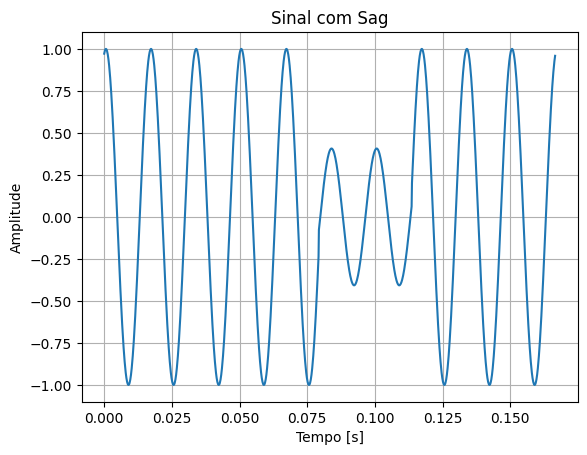

banco de harmônicos: 100% completo
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]
[[0.70710678]
 [0.70710678]
 [0.70710678]
 [0.70710678]
 [0.70710678]
 [1.24507313]
 [1.38449591]
 [1.38449591]
 [1.38449591]
 [1.38449591]]
[[2.09164443e-14]
 [5.21619745e-14]
 [9.26840149e-14]
 [1.11006066e-13]
 [1.01002722e-13]
 [2.32852220e+01]
 [6.80517423e+00]
 [6.80517423e+00]
 [6.80517423e+00]
 [6.80517423e+00]]


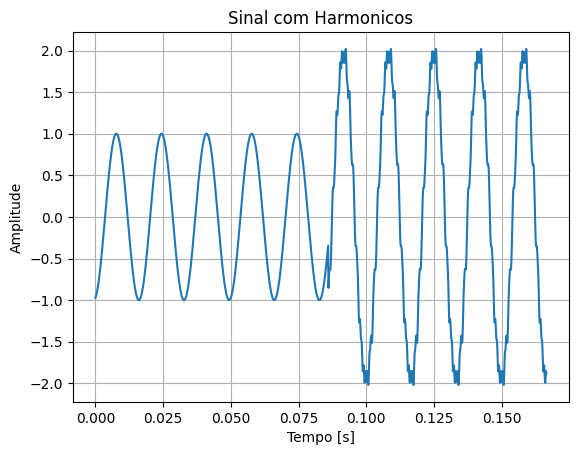

Gerando sinais de transitórios...
banco transitórios oscilatórios: 10% completo
banco transitórios oscilatórios: 20% completo
banco transitórios oscilatórios: 30% completo
banco transitórios oscilatórios: 40% completo
banco transitórios oscilatórios: 50% completo
banco transitórios oscilatórios: 60% completo
banco transitórios oscilatórios: 70% completo
banco transitórios oscilatórios: 80% completo
banco transitórios oscilatórios: 90% completo
banco transitórios oscilatórios: 100% completo
Gerando sinais de swell...
banco swell: 10% completo
banco swell: 20% completo
banco swell: 30% completo
banco swell: 40% completo
banco swell: 50% completo
banco swell: 60% completo
banco swell: 70% completo
banco swell: 80% completo
banco swell: 90% completo
banco swell: 100% completo
Gerando sinais de sag...
banco sag: 10% completo
banco sag: 20% completo
banco sag: 30% completo
banco sag: 40% completo
banco sag: 50% completo
banco sag: 60% completo
banco sag: 70% completo
banco sag: 80% completo


In [ ]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras

def gera_banco_transitorio(Nsinais, f0, fs, Nciclos, Nppc, Ncpf, SNR):
    Ts = 1 / fs

    # Parâmetros do transitório
    tt_min = 0.3e-3
    tt_max = 50e-3
    ft_min = 2000
    ft_max = 5000
    at_min = 1
    at_max = 4

    # Eixo de tempo
    t = np.arange(0, Nciclos / f0, Ts)
    Nt = len(t)
    banco = np.zeros((Nt, Nsinais))
    amostra_inic_trans = np.zeros(Nsinais, dtype=int)
    amostra_fim_trans = np.zeros(Nsinais, dtype=int)

    # Passo para imprimir 10 em 10%
    step_print = max(1, Nsinais // 10)

    for n in range(Nsinais):
        # Ponto de inserção do transitório
        pt = int(np.floor(np.random.uniform(4.5 * Nppc, len(t))))
        amostra_inic_trans[n] = pt + 2

        at = np.random.uniform(at_min, at_max)
        tt = np.random.uniform(tt_min, tt_max)
        A = 4 / tt

        amostra_fim = amostra_inic_trans[n] + int(np.ceil(tt / Ts))
        amostra_fim = min(amostra_fim, len(t))
        amostra_fim_trans[n] = amostra_fim

        fase = np.random.uniform(-np.pi, np.pi)
        fund = np.cos(2 * np.pi * f0 * t + fase)

        ft = np.random.uniform(ft_min, ft_max)
        fase_t = np.random.uniform(-np.pi, np.pi)
        trans_duration = t[pt:]

        expo = exponencial(-A * t[:len(trans_duration)])
        trans = at * expo * np.cos(ft * trans_duration + fase_t)
        trans = np.concatenate([np.zeros(pt), trans])

        var_ruido = 0.5 * 10 ** (-SNR / 10)
        ruido = np.sqrt(var_ruido) * np.random.randn(len(t))

        sinal = fund + trans + ruido
        banco[:, n] = sinal

        # Print de 10 em 10%
        if ((n + 1) % step_print == 0) or (n + 1 == Nsinais):
            perc = 100 * (n + 1) / Nsinais
            print(f"banco transitórios oscilatórios: {perc:.0f}% completo")

    Nframes = Nciclos // Ncpf
    Nppf = Ncpf * Nppc

    inst_novidade = np.zeros((len(t), Nsinais), dtype=int)
    matrizes_novid = []
    frames_novid = np.zeros((Nframes, Nsinais), dtype=int)

    for kk in range(Nsinais):
        ini = amostra_inic_trans[kk]
        fim = amostra_fim_trans[kk]
        inst_novidade[ini:fim, kk] = 1

        matriz = inst_novidade[:, kk][:Nframes * Nppf].reshape((Nframes, Nppf))
        matrizes_novid.append(matriz)
        frames_novid[:, kk] = np.any(matriz, axis=1).astype(int)

    # Propagação do evento de novidade para frame seguinte
    frames_novid = np.logical_or(
        frames_novid,
        np.vstack([np.zeros((1, Nsinais), dtype=int), frames_novid[:-1, :]])
    ).astype(int)

    return banco, t, frames_novid

def exponencial(entrada):
    saida = np.zeros_like(entrada)
    saida[entrada < 0] = np.exp(entrada[entrada < 0])
    return saida

def gera_banco_swell(Nsinais, f0, fs, Nciclos, Nppc, Ncpf, SNR):
    """
    Gera banco de dados de sinais com distúrbios do tipo swell.

    Parâmetros:
        Nsinais: int - número de sinais a serem gerados
        f0: float - frequência fundamental (Hz)
        fs: float - frequência de amostragem (Hz)
        Nciclos: int - número de ciclos da fundamental
        Nppc: int - número de pontos por ciclo
        Ncpf: int - número de ciclos por frame
        SNR: float - relação sinal-ruído em dB

    Retorna:
        banco: ndarray - matriz de sinais gerados (cada coluna é um sinal)
        t: ndarray - vetor de tempo
        frames_novid: ndarray - matriz de detecção de novidade por frame
    """
    # Parâmetros adicionais do swell
    a_min = 1.1
    a_max = 1.9

    # Vetor de tempo
    t = np.arange(0, Nciclos / f0, 1 / fs)
    Nt = len(t)

    banco = np.zeros((Nt, Nsinais))
    amostra_inic_SWELL = np.zeros(Nsinais, dtype=int)
    amostra_fim_SWELL = np.zeros(Nsinais, dtype=int)

    # Passo para imprimir 10 em 10%
    step_print = max(1, Nsinais // 10)

    for n in range(Nsinais):
        fase = np.random.uniform(-np.pi, np.pi)
        a = np.random.uniform(a_min, a_max)

        pt = int(np.floor(np.random.uniform(4.5 * Nppc, 3 * len(t) / 4)))
        amostra_inic_SWELL[n] = pt + 2

        intervalo_disponivel = len(t) - pt
        dpt = int(np.floor(np.random.uniform(0.2 * intervalo_disponivel, 0.75 * intervalo_disponivel)))
        amostra_fim = amostra_inic_SWELL[n] + dpt - 1
        amostra_fim = min(amostra_fim, len(t))
        amostra_fim_SWELL[n] = amostra_fim

        fat = 10000
        t_sub = t[:dpt]
        t_dec = t[:len(t) - (pt + dpt)]

        sub = a - np.exp(-(fat * t_sub / 0.01) + np.log(a - 1))
        dec = 1 + np.exp(-(fat * t_dec / 0.01) + np.log(a - 1))

        swell = np.concatenate([
            np.ones(pt),
            sub,
            dec
        ])

        # Caso o swell seja um pouco menor que o total, completa com 1s
        if len(swell) < len(t):
            swell = np.concatenate([swell, np.ones(len(t) - len(swell))])
        else:
            swell = swell[:len(t)]

        fund = np.cos(2 * np.pi * f0 * t + fase) * swell

        var_ruido = 0.5 * 10 ** (-SNR / 10)
        ruido = np.sqrt(var_ruido) * np.random.randn(len(t))

        sinal = fund + ruido
        banco[:, n] = sinal

        # Print de 10 em 10%
        if ((n + 1) % step_print == 0) or (n + 1 == Nsinais):
            perc = 100 * (n + 1) / Nsinais
            print(f"banco swell: {perc:.0f}% completo")

    Nframes = Nciclos // Ncpf
    Nppf = Ncpf * Nppc

    inst_novidade = np.zeros((len(t), Nsinais), dtype=int)
    frames_novid = np.zeros((Nframes, Nsinais), dtype=int)

    for kk in range(Nsinais):
        ini = amostra_inic_SWELL[kk]
        fim = amostra_fim_SWELL[kk]
        inst_novidade[ini, kk] = 1
        inst_novidade[fim - 1, kk] = 1

        inst_trim = inst_novidade[:, kk][:Nframes * Nppf]
        matriz = inst_trim.reshape((Nframes, Nppf))
        frames_novid[:, kk] = np.any(matriz, axis=1).astype(int)

    # Propaga novidade para frame seguinte
    frames_novid = np.logical_or(
        frames_novid,
        np.vstack([np.zeros((1, Nsinais), dtype=int), frames_novid[:-1, :]])
    ).astype(int)

    return banco, t, frames_novid

def gera_banco_sag(Nsinais, f0, fs, Nciclos, Nppc, Ncpf, SNR):
    """
    Gera banco de dados com distúrbios do tipo SAG (afundamentos de tensão).

    Parâmetros:
        Nsinais : int     - número de sinais a serem gerados
        f0      : float   - frequência fundamental (Hz)
        fs      : float   - frequência de amostragem (Hz)
        Nciclos : int     - número de ciclos do sinal
        Nppc    : int     - número de pontos por ciclo
        Ncpf    : int     - número de ciclos por frame
        SNR     : float   - relação sinal-ruído (dB)

    Retornos:
        banco         : ndarray (Nt x Nsinais) - sinais gerados
        t             : ndarray (Nt,)          - vetor de tempo
        frames_novid  : ndarray (Nframes x Nsinais) - indica onde há novidade
    """

    # Amplitudes mínimas e máximas do SAG (remanescente da tensão)
    a_min = 0.2
    a_max = 0.9

    # Eixo do tempo
    t = np.arange(0, Nciclos / f0, 1 / fs)
    Nt = len(t)

    banco = np.zeros((Nt, Nsinais))
    amostra_inic_SAG = np.zeros(Nsinais, dtype=int)
    amostra_fim_SAG = np.zeros(Nsinais, dtype=int)

    # Passo para imprimir 10 em 10%
    step_print = max(1, Nsinais // 10)

    for n in range(Nsinais):
        fase = np.random.uniform(-np.pi, np.pi)
        a = np.random.uniform(a_min, a_max)

        pt = int(np.floor(np.random.uniform(4.5 * Nppc, 3 * len(t) / 4)))
        amostra_inic_SAG[n] = pt + 2

        intervalo_disponivel = len(t) - pt
        dpt = int(np.floor(np.random.uniform(0.2 * intervalo_disponivel, 0.75 * intervalo_disponivel)))
        fim = amostra_inic_SAG[n] + dpt - 1
        amostra_fim_SAG[n] = min(fim, len(t))

        fat = 10000
        t_dec = t[:dpt]
        t_sub = t[:len(t) - (pt + dpt)]

        dec = a + np.exp(-(fat * t_dec / 0.01) + np.log(1 - a))
        sub = 1 - np.exp(-(fat * t_sub / 0.01) + np.log(1 - a))

        sag = np.concatenate([
            np.ones(pt),
            dec,
            sub
        ])

        # Ajuste para mesmo comprimento
        if len(sag) < len(t):
            sag = np.concatenate([sag, np.ones(len(t) - len(sag))])
        else:
            sag = sag[:len(t)]

        fund = np.cos(2 * np.pi * f0 * t + fase) * sag

        var_ruido = 0.5 * 10 ** (-SNR / 10)
        ruido = np.sqrt(var_ruido) * np.random.randn(len(t))

        sinal = fund + ruido
        banco[:, n] = sinal

        # Print de 10 em 10%
        if ((n + 1) % step_print == 0) or (n + 1 == Nsinais):
            perc = 100 * (n + 1) / Nsinais
            print(f"banco sag: {perc:.0f}% completo")

    Nframes = Nciclos // Ncpf
    Nppf = Ncpf * Nppc

    inst_novidade = np.zeros((len(t), Nsinais), dtype=int)
    frames_novid = np.zeros((Nframes, Nsinais), dtype=int)

    for kk in range(Nsinais):
        ini = amostra_inic_SAG[kk]
        fim = amostra_fim_SAG[kk] - 1  # -1 para corresponder ao fim real do evento
        inst_novidade[ini, kk] = 1
        if fim < len(t):
            inst_novidade[fim, kk] = 1

        inst_trim = inst_novidade[:, kk][:Nframes * Nppf]
        matriz = inst_trim.reshape((Nframes, Nppf))
        frames_novid[:, kk] = np.any(matriz, axis=1).astype(int)

    frames_novid = np.logical_or(
        frames_novid,
        np.vstack([np.zeros((1, Nsinais), dtype=int), frames_novid[:-1, :]])
    ).astype(int)

    return banco, t, frames_novid

def gera_banco_harmonicos(Nsinais, f0, fs, Nciclos, Nppc, Ncpf, SNR):
    """
    Gera banco de dados com distúrbios harmônicos.
    """
    # Entradas adicionais
    ordem_max = 25
    THD_min = 5
    THD_max = 100

    # Eixo do tempo
    t = np.arange(0, Nciclos / f0, 1 / fs)
    Nt = len(t)

    # Casos de harmônicos
    n_casos = 5
    ordem_h = np.zeros((n_casos, ordem_max + 1), dtype=int)

    ordem_h[0, 1:26:2] = 1  # Ímpares
    ordem_h[1, [1] + list(range(3, 26, 3))] = 1  # Múltiplos de 3
    ordem_h[2, [1, 5, 7, 11, 13, 17, 19, 23, 25]] = 1
    ordem_h[3, [1, 11, 13, 23, 25]] = 1
    ordem_h[4, 1:26] = 1

    porcentagem = np.array([20, 25, 25, 25, 5])
    p_acc = np.cumsum(porcentagem)

    banco = np.zeros((Nt, Nsinais))
    amostra_inic_HARM = np.zeros(Nsinais, dtype=int)

    # Passo para imprimir 10 em 10%
    step_print = max(1, Nsinais // 10)

    m = 0
    while m < Nsinais:
        pt = int(np.floor(np.random.uniform(0.2 * Nt, 0.8 * Nt)))

        fase = np.random.uniform(-np.pi, np.pi)
        fund = np.cos(2 * np.pi * f0 * t + fase)

        var_ruido = 0.5 * 10 ** (-SNR / 10)
        ruido = np.sqrt(var_ruido) * np.random.randn(Nt)

        # Seleção do tipo de harmônico
        indice = np.random.randint(1, 101)
        # Encontrar o primeiro índice onde p_acc > indice
        indices_validos = np.where(p_acc >= indice)[0]
        if len(indices_validos) == 0:
            ind = 2  # Fallback
        else:
            ind = indices_validos[0]

        harm = np.zeros(Nt)
        ordens_ativas = np.where(ordem_h[ind, :] == 1)[0]

        for n_ord in ordens_ativas:
            if n_ord == 0:  # Pular DC
                continue
            if n_ord * f0 >= fs / 2:  # Evitar aliasing
                continue

            ah = 1 / n_ord
            ph = np.random.uniform(-np.pi, np.pi)
            harm[pt:] += ah * np.cos(2 * np.pi * n_ord * f0 * t[:Nt - pt] + ph)

        THD = np.sqrt(np.sum(harm[pt:] ** 2) / np.sum(fund[pt:] ** 2)) * 100

        if THD_min <= THD <= THD_max:
            sinal = fund + harm + ruido
            banco[:, m] = sinal
            amostra_inic_HARM[m] = pt + 1
            m += 1

            # Print de 10 em 10%
            if (m % step_print == 0) or (m == Nsinais):
                perc = 100 * m / Nsinais
                print(f"banco de harmônicos: {perc:.0f}% completo")

    Nframes = Nciclos // Ncpf
    Nppf = Ncpf * Nppc

    frames_novid = np.zeros((Nframes, Nsinais), dtype=int)
    inst_novidade = np.zeros((Nt, Nsinais), dtype=int)

    for kk in range(Nsinais):
        inst_novidade[amostra_inic_HARM[kk], kk] = 1
        inst_trim = inst_novidade[:, kk][:Nframes * Nppf]
        matriz = inst_trim.reshape((Nframes, Nppf))
        frames_novid[:, kk] = np.any(matriz, axis=1).astype(int)

    frames_novid = np.logical_or(
        frames_novid,
        np.vstack([np.zeros((1, Nsinais), dtype=int), frames_novid[:-1, :]])
    ).astype(int)

    return banco, t, frames_novid

def rms_por_janela(sinal, n_pontos_janela):
    # Garantir que o sinal seja 2D para indexação consistente
    if sinal.ndim == 1:
        sinal = sinal[:, np.newaxis]

    Nt, Nsinais = sinal.shape
    num_janelas = Nt // n_pontos_janela
    rms_values = np.zeros((num_janelas, Nsinais))

    for s_idx in range(Nsinais):
        current_signal = sinal[:, s_idx]
        for i in range(num_janelas):
            start = i * n_pontos_janela
            end = start + n_pontos_janela
            window = current_signal[start:end]
            if len(window) > 0:
                rms_values[i, s_idx] = np.sqrt(np.mean(window**2))
            else:
                rms_values[i, s_idx] = np.nan  # Ou 0, dependendo do comportamento desejado
    return rms_values

def thd_por_janela(sinal, fs, f0, n_pontos_janela):
    # Garantir que o sinal seja 2D para indexação consistente
    if sinal.ndim == 1:
        sinal = sinal[:, np.newaxis]

    Nt, Nsinais = sinal.shape
    num_janelas = Nt // n_pontos_janela
    thd_values = np.zeros((num_janelas, Nsinais))

    for s_idx in range(Nsinais):
        current_signal = sinal[:, s_idx]
        for i in range(num_janelas):
            start = i * n_pontos_janela
            end = start + n_pontos_janela
            window = current_signal[start:end]

            if len(window) == 0:
                thd_values[i, s_idx] = np.nan
                continue

            # Executar FFT
            N = len(window)
            if N == 0:
                thd_values[i, s_idx] = np.nan
                continue
            yf = scipy.fft.fft(window)
            xf = scipy.fft.fftfreq(N, 1 / fs)

            # Considerar apenas frequências positivas (e ignorar componente DC)
            pos_freq_mask = xf > 0
            xf_pos = xf[pos_freq_mask]
            yf_pos = yf[pos_freq_mask]

            if len(xf_pos) == 0:
                thd_values[i, s_idx] = np.nan
                continue

            # Encontrar o índice da componente fundamental nas frequências positivas
            # Verificar se f0 está dentro do intervalo de frequências da janela
            if f0 < xf_pos[0] or f0 > xf_pos[-1]:
                thd_values[i, s_idx] = np.nan  # f0 não detectável nesta janela
                continue

            idx_f0_pos = np.argmin(np.abs(xf_pos - f0))
            fund_amplitude = np.abs(yf_pos[idx_f0_pos])

            harmonic_amplitudes_sq = 0
            # Iterar pelos harmônicos possíveis
            max_harmonic_order = min(25, int(fs / (2 * f0)) - 1)  # Limitado por Nyquist e garantir h*f0 < Nyquist

            for h in range(2, max_harmonic_order + 1):  # Do 2º até max_harmonic_order
                target_freq = h * f0
                if target_freq >= fs / 2:  # Excede a frequência de Nyquist
                    break

                idx_h_pos = np.argmin(np.abs(xf_pos - target_freq))
                harmonic_amplitudes_sq += (np.abs(yf_pos[idx_h_pos])**2)

            if fund_amplitude > 1e-9:  # Evitar divisão por zero ou fundamental muito pequena
                thd = (np.sqrt(harmonic_amplitudes_sq) / fund_amplitude) * 100
                thd_values[i, s_idx] = thd
            else:
                thd_values[i, s_idx] = 0.0  # Se fundamental ausente/pequena, THD pode ser 0 ou NaN
    return thd_values

# Parâmetros
Nsinais = 1
f0 = 60
fs = 7680
Nciclos = 10
Nppc = 128
Ncpf = 1
SNR = 10000

banco_transitorio, t, frames_novid = gera_banco_transitorio(Nsinais, f0, fs, Nciclos, Nppc, Ncpf, SNR)

print(frames_novid)

# Colocar num loop para rodar separadamente pra cada sinal
rms_transitorio = rms_por_janela(banco_transitorio, Nppc)
print(rms_transitorio)

# Colocar num loop para rodar separadamente pra cada sinal
thd_transitorio = thd_por_janela(banco_transitorio, fs, f0, Nppc)
print(thd_transitorio)

# Visualização
plt.plot(t, banco_transitorio[:, 0])
plt.title("Sinal com Transitório Oscilatório")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

banco_swell, t, frames_novid = gera_banco_swell(Nsinais, f0, fs, Nciclos, Nppc, Ncpf, SNR)

print(frames_novid)

rms_swell = rms_por_janela(banco_swell, Nppc)
print(rms_swell)

thd_swell = thd_por_janela(banco_swell, fs, f0, Nppc)
print(thd_swell)

# Visualização
plt.plot(t, banco_swell[:, 0])
plt.title("Sinal com Swell")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

banco_sag, t, frames_novid = gera_banco_sag(Nsinais, f0, fs, Nciclos, Nppc, Ncpf, SNR)

print(frames_novid)
rms_sag = rms_por_janela(banco_sag, Nppc)
print(rms_sag)
thd_sag = thd_por_janela(banco_sag, fs, f0, Nppc)
print(thd_sag)

# Visualização
plt.plot(t, banco_sag[:, 0])
plt.title("Sinal com Sag")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

banco_harmonicos, t, frames_novid = gera_banco_harmonicos(Nsinais, f0, fs, Nciclos, Nppc, Ncpf, SNR)

print(frames_novid)

rms_harmonicos = rms_por_janela(banco_harmonicos, Nppc)
print(rms_harmonicos)

thd_harmonicos = thd_por_janela(banco_harmonicos, fs, f0, Nppc)
print(thd_harmonicos)

# Visualização
plt.plot(t, banco_harmonicos[:, 0])
plt.title("Sinal com Harmonicos")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Criação do dataset
# Parâmetros comuns
Nsinais = 500  # 500 de cada tipo para ter um dataset balanceado
f0 = 60
fs = 7680
Nciclos = 10
Nppc = 128
Ncpf = 1
SNR = 10000

def criar_dataset_completo():
    """Cria dataset com todos os tipos de distúrbios"""

    print("Gerando sinais de transitórios...")
    banco_trans, t, frames_trans = gera_banco_transitorio(Nsinais, f0, fs, Nciclos, Nppc, Ncpf, SNR)
    print("Gerando sinais de swell...")
    banco_swell, t, frames_swell = gera_banco_swell(Nsinais, f0, fs, Nciclos, Nppc, Ncpf, SNR)
    print("Gerando sinais de sag...")
    banco_sag, t, frames_sag = gera_banco_sag(Nsinais, f0, fs, Nciclos, Nppc, Ncpf, SNR)
    print("Gerando sinais harmônicos...")
    banco_harm, t, frames_harm = gera_banco_harmonicos(Nsinais, f0, fs, Nciclos, Nppc, Ncpf, SNR)
    print("Gerando sinais normais...")

    # Sinal normal (sem distúrbios)
    banco_normal = np.zeros((len(t), Nsinais))
    for n in range(Nsinais):
        fase = np.random.uniform(-np.pi, np.pi)
        banco_normal[:, n] = np.cos(2 * np.pi * f0 * t + fase)

    return {
        'transitorio': banco_trans,
        'swell': banco_swell,
        'sag': banco_sag,
        'harmonico': banco_harm,
        'normal': banco_normal
    }, t

# Criar o dataset
dataset, tempo = criar_dataset_completo()

In [ ]:
def extrair_caracteristicas(dataset, t, fs, f0, Nppc):
    """Extrai características RMS e THD de cada sinal"""

    caracteristicas = []
    rotulos = []

    for tipo, banco in dataset.items():
        print(f"Processando {tipo}...")

        for i in range(banco.shape[1]):
            sinal = banco[:, i]

            # Calcular RMS por janela
            rms_values = rms_por_janela(sinal, Nppc)
            thd_values = thd_por_janela(sinal, fs, f0, Nppc)

            # Estatísticas das características
            rms_mean = np.mean(rms_values)
            rms_std = np.std(rms_values)
            rms_max = np.max(rms_values)
            rms_min = np.min(rms_values)

            thd_mean = np.mean(thd_values)
            thd_std = np.std(thd_values)
            thd_max = np.max(thd_values)

            # Características no domínio do tempo
            amplitude_max = np.max(np.abs(sinal))
            variancia = np.var(sinal)

            # Coletar todas as características
            feat_vector = [
                rms_mean, rms_std, rms_max, rms_min,
                thd_mean, thd_std, thd_max,
                amplitude_max, variancia
            ]

            caracteristicas.append(feat_vector)
            rotulos.append(tipo)

    return np.array(caracteristicas), np.array(rotulos)

# Extrair características
X, y = extrair_caracteristicas(dataset, tempo, fs, f0, Nppc)

print(f"Shape das características: {X.shape}")
print(f"Shape dos rótulos: {y.shape}")
print(f"Distribuição dos rótulos: {np.unique(y, return_counts=True)}")

Processando transitorio...
Processando swell...
Processando sag...
Processando harmonico...
Processando normal...
Shape das características: (2500, 9)
Shape dos rótulos: (2500,)
Distribuição dos rótulos: (array(['harmonico', 'normal', 'sag', 'swell', 'transitorio'], dtype='<U11'), array([500, 500, 500, 500, 500]))


In [ ]:
# Codificar rótulos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Classes encontradas:", label_encoder.classes_)
print("Rótulos codificados únicos:", np.unique(y_encoded))

# Normalizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nPARÂMETROS DO STANDARD SCALER")
print("mean_ =", scaler.mean_)
print("scale_ =", scaler.scale_)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"Treino: {X_train.shape}")
print(f"Teste:  {X_test.shape}")

Classes encontradas: ['harmonico' 'normal' 'sag' 'swell' 'transitorio']
Rótulos codificados únicos: [0 1 2 3 4]

PARÂMETROS DO STANDARD SCALER
mean_ = [ 0.73835022  0.09401645  0.89282286  0.63814086  5.45804315 10.58759945
 33.28025626  1.55266966  0.56917364]
scale_ = [ 0.09280592  0.08149485  0.22581697  0.13816343  6.19104165 12.57584063
 40.42863681  0.78013346  0.16322459]
Treino: (2000, 9)
Teste:  (500, 9)


In [ ]:
import numpy as np

# Conferir mapeamento rótulo -> índice
print("Classes do LabelEncoder:", label_encoder.classes_)

# Calcular um vetor representativo (média) de cada classe em ESCALA ORIGINAL
vetores_por_classe = {}

for classe_nome in label_encoder.classes_:
    idx_classe = label_encoder.transform([classe_nome])[0]   # Ex: "harmonico" -> 0
    mask = (y_encoded == idx_classe)

    X_scaled_classe = X_scaled[mask]           # Todos os exemplos dessa classe (normalizados)
    mean_scaled = X_scaled_classe.mean(axis=0) # Média no espaço normalizado

    # Voltar para a escala original das features
    mean_original = scaler.inverse_transform(mean_scaled.reshape(1, -1))[0]

    vetores_por_classe[classe_nome] = mean_original

    print(f"\nClasse: {classe_nome}")
    for i, val in enumerate(mean_original):
        print(f"  feat[{i}] = {val:.4f}")

Classes do LabelEncoder: ['harmonico' 'normal' 'sag' 'swell' 'transitorio']

Classe: harmonico
  feat[0] = 0.8121
  feat[1] = 0.1542
  feat[2] = 0.9994
  feat[3] = 0.6502
  feat[4] = 8.2784
  feat[5] = 10.5522
  feat[6] = 34.8898
  feat[7] = 1.5066
  feat[8] = 0.7142

Classe: normal
  feat[0] = 0.7071
  feat[1] = -0.0000
  feat[2] = 0.7071
  feat[3] = 0.7071
  feat[4] = 0.0000
  feat[5] = -0.0000
  feat[6] = 0.0000
  feat[7] = 0.9999
  feat[8] = 0.5000

Classe: sag
  feat[0] = 0.6507
  feat[1] = 0.1012
  feat[2] = 0.7071
  feat[3] = 0.4195
  feat[4] = 3.9302
  feat[5] = 8.2840
  feat[6] = 23.9000
  feat[7] = 0.9999
  feat[8] = 0.4376

Classe: swell
  feat[0] = 0.7783
  feat[1] = 0.1223
  feat[2] = 1.0427
  feat[3] = 0.7071
  feat[4] = 2.3112
  feat[5] = 4.8346
  feat[6] = 13.8106
  feat[7] = 1.5061
  feat[8] = 0.6266

Classe: transitorio
  feat[0] = 0.7435
  feat[1] = 0.0923
  feat[2] = 1.0078
  feat[3] = 0.7068
  feat[4] = 12.7704
  feat[5] = 29.2673
  feat[6] = 93.8009
  feat[7] = 2.

In [ ]:
# Treinar Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Avaliar
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia Random Forest: {accuracy_rf:.4f}")
print("\nRelatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

Acurácia Random Forest: 0.9880

Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

   harmonico       0.97      0.97      0.97       100
      normal       1.00      1.00      1.00       100
         sag       1.00      1.00      1.00       100
       swell       0.97      0.97      0.97       100
 transitorio       1.00      1.00      1.00       100

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



In [ ]:
def criar_modelo_mlp(input_dim, num_classes):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(num_classes, activation='linear')
    ])

    model.compile(
        optimizer='adam',
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    return model

# Criar e treinar o modelo
num_classes = len(label_encoder.classes_)
mlp_model = criar_modelo_mlp(X_train.shape[1], num_classes)

print(mlp_model.summary())

# Treinar
history = mlp_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Avaliar
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"\nAcurácia MLP: {test_accuracy:.4f}")

# Fazer previsões
y_pred_mlp = np.argmax(mlp_model.predict(X_test), axis=1)
print("\nRelatório de Classificação - MLP:")
print(classification_report(y_test, y_pred_mlp, target_names=label_encoder.classes_))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,885 (11.27 KB)

 Trainable params: 2,885 (11.27 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4687 - loss: 1.3523 - val_accuracy: 0.8000 - val_loss: 0.8128
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7523 - loss: 0.8472 - val_accuracy: 0.8525 - val_loss: 0.4793
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8265 - loss: 0.5780 - val_accuracy: 0.9150 - val_loss: 0.3095
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8743 - loss: 0.3944 - val_accuracy: 0.9225 - val_loss: 0.2361
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8911 - loss: 0.3475 - val_accuracy: 0.9375 - val_loss: 0.1932
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9096 - loss: 0.2906 - val_accuracy: 0.9575 - val_loss: 0.1684
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9160 - loss: 0.2632 - val_accuracy: 0.9600 - val_loss: 0.1514
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9240 - loss: 0.2326 - val_accuracy: 0.967

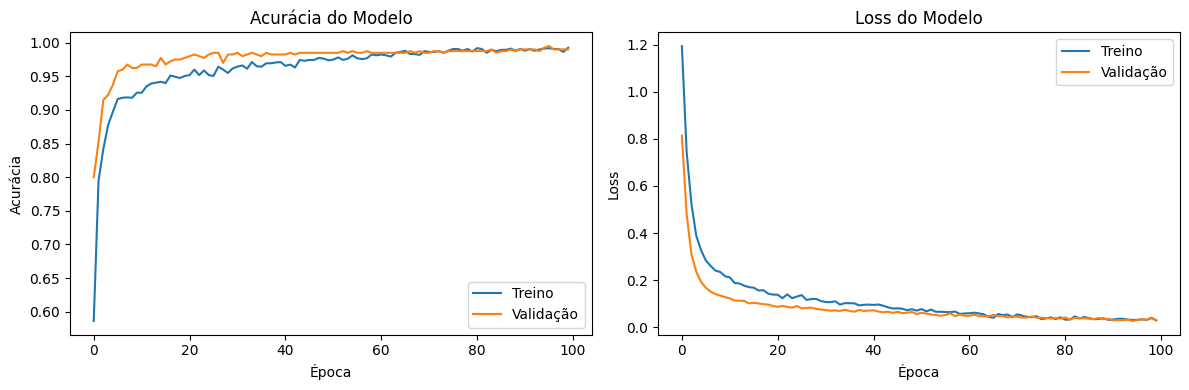

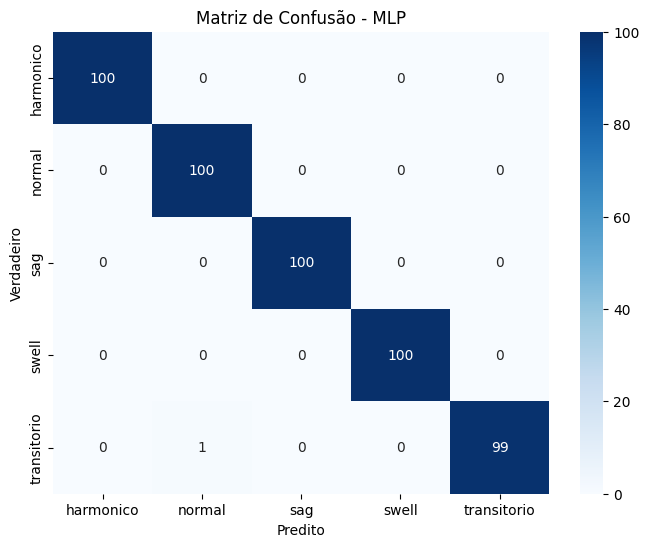

In [ ]:
import matplotlib.pyplot as plt

# Plotar evolução do treinamento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia do Modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss do Modelo')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - MLP')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()

Gerando visualizações comparativas...
COMPARAÇÃO ENTRE MODELOS
Random Forest Accuracy: 0.9880
MLP Accuracy: 0.9980
Diferença: 0.0100

RANDOM FOREST - Relatório Detalhado
              precision    recall  f1-score   support

   harmonico       0.97      0.97      0.97       100
      normal       1.00      1.00      1.00       100
         sag       1.00      1.00      1.00       100
       swell       0.97      0.97      0.97       100
 transitorio       1.00      1.00      1.00       100

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500


MLP - Relatório Detalhado
              precision    recall  f1-score   support

   harmonico       1.00      1.00      1.00       100
      normal       0.99      1.00      1.00       100
         sag       1.00      1.00      1.00       100
       swell       1.00      1.00      1.00       100
 transitorio       1.00      0.99      0.99

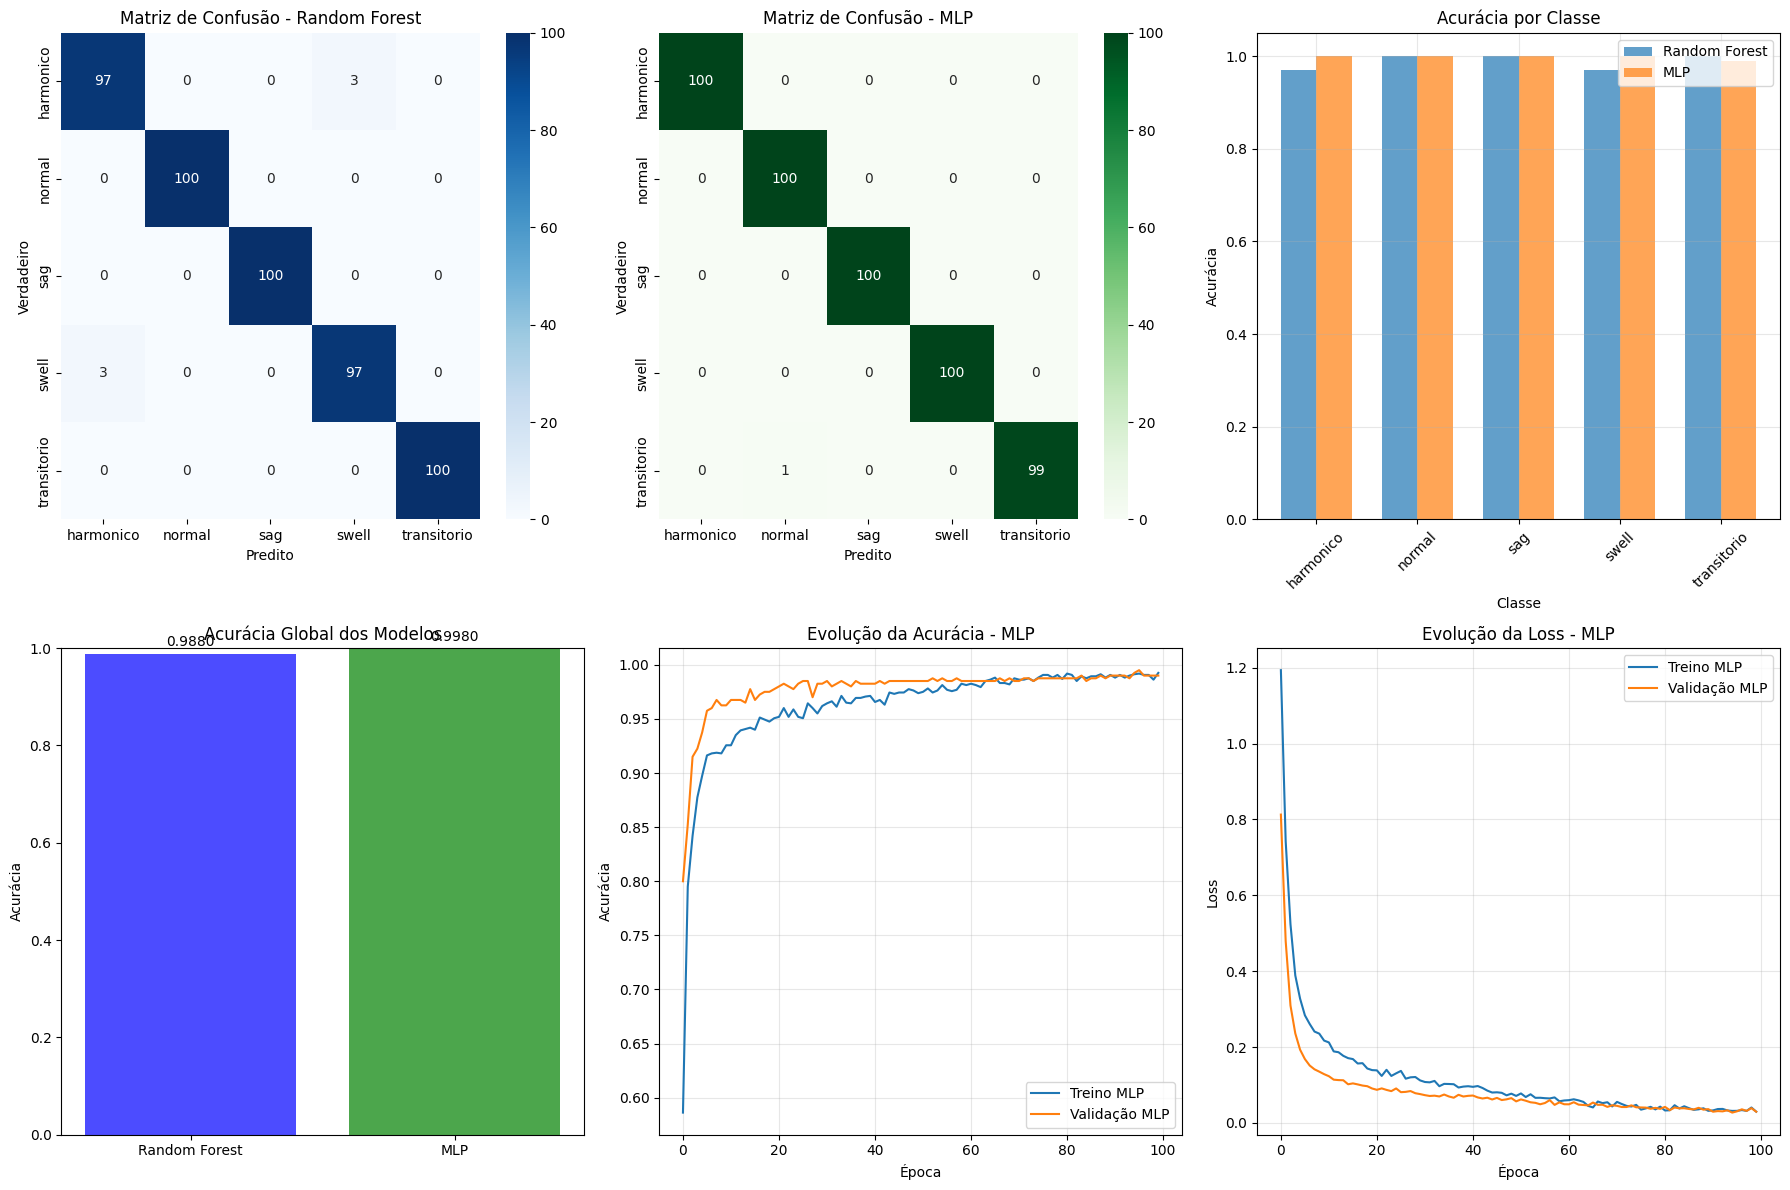


VARIÂNCIA E DESVIO-PADRÃO DOS ERROS (amostra a amostra)
Random Forest  -> Var(erro): 1.1856e-02 | Std(erro): 1.0889e-01
MLP            -> Var(erro): 1.9960e-03 | Std(erro): 4.4677e-02


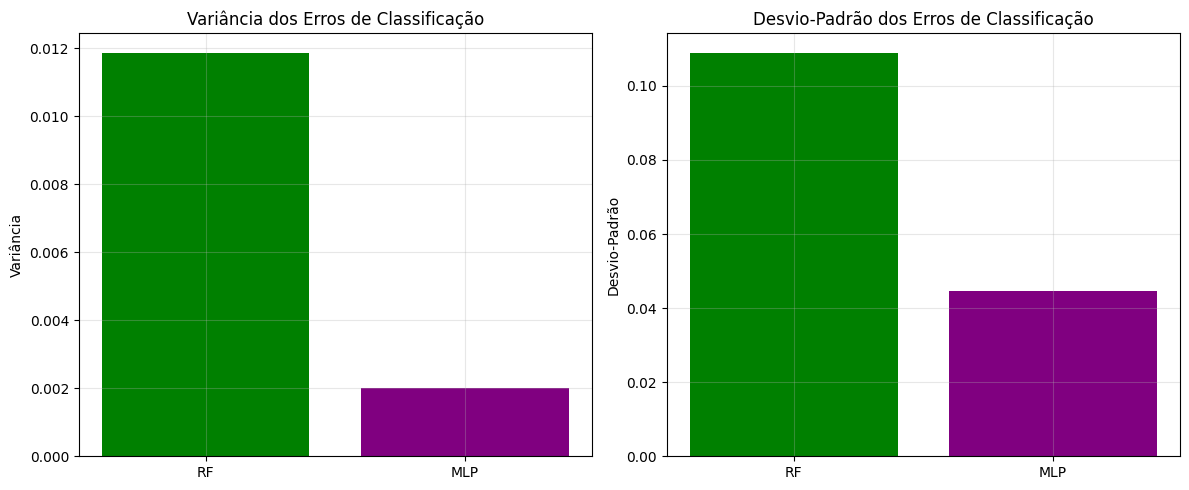


DECISÃO PARA IMPLEMENTAÇÃO NO ESP32
RECOMENDAÇÃO: Usar MLP no ESP32
Motivos:
- Melhor acurácia
- Boa compatibilidade com TensorFlow Lite

Acurácia Random Forest: 0.9880
Acurácia MLP: 0.9980


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

def visualizar_resultados_comparativos(y_test, y_pred_rf, y_pred_mlp, label_encoder, history=None):
    """Visualiza resultados comparativos para Random Forest e MLP"""

    # Métricas de comparação
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    print("=" * 60)
    print("COMPARAÇÃO ENTRE MODELOS")
    print("=" * 60)
    print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
    print(f"MLP Accuracy: {accuracy_mlp:.4f}")
    print(f"Diferença: {abs(accuracy_rf - accuracy_mlp):.4f}")

    # Relatórios de classificação detalhados
    print("\n" + "=" * 40)
    print("RANDOM FOREST - Relatório Detalhado")
    print("=" * 40)
    print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

    print("\n" + "=" * 40)
    print("MLP - Relatório Detalhado")
    print("=" * 40)
    print(classification_report(y_test, y_pred_mlp, target_names=label_encoder.classes_))

    # Gráficos comparativos
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Matriz de Confusão: Random Forest
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    axes[0,0].set_title('Matriz de Confusão - Random Forest')
    axes[0,0].set_ylabel('Verdadeiro')
    axes[0,0].set_xlabel('Predito')

    # Matriz de Confusão: MLP
    cm_mlp = confusion_matrix(y_test, y_pred_mlp)
    sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', ax=axes[0,1],
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    axes[0,1].set_title('Matriz de Confusão - MLP')
    axes[0,1].set_ylabel('Verdadeiro')
    axes[0,1].set_xlabel('Predito')

    # Comparação de Acurácia por Classe
    classes = label_encoder.classes_
    acc_rf_per_class = []
    acc_mlp_per_class = []

    for i, class_name in enumerate(classes):
        mask = y_test == i
        if np.sum(mask) > 0:
            acc_rf = np.mean(y_pred_rf[mask] == y_test[mask])
            acc_mlp = np.mean(y_pred_mlp[mask] == y_test[mask])
            acc_rf_per_class.append(acc_rf)
            acc_mlp_per_class.append(acc_mlp)

    x = np.arange(len(classes))
    width = 0.35

    axes[0,2].bar(x - width/2, acc_rf_per_class, width, label='Random Forest', alpha=0.7)
    axes[0,2].bar(x + width/2, acc_mlp_per_class, width, label='MLP', alpha=0.7)
    axes[0,2].set_title('Acurácia por Classe')
    axes[0,2].set_xlabel('Classe')
    axes[0,2].set_ylabel('Acurácia')
    axes[0,2].set_xticks(x)
    axes[0,2].set_xticklabels(classes, rotation=45)
    axes[0,2].legend()
    axes[0,2].grid(True, alpha=0.3)

    # Comparação de Acurácia Global
    models = ['Random Forest', 'MLP']
    accuracies = [accuracy_rf, accuracy_mlp]

    bars = axes[1,0].bar(models, accuracies, color=['blue', 'green'], alpha=0.7)
    axes[1,0].set_title('Acurácia Global dos Modelos')
    axes[1,0].set_ylabel('Acurácia')
    axes[1,0].set_ylim(0, 1)

    # Adicionar valores nas barras
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{acc:.4f}', ha='center', va='bottom')

    # Histórico de Treinamento do MLP
    if history is not None:
        axes[1,1].plot(history.history['accuracy'], label='Treino MLP')
        axes[1,1].plot(history.history['val_accuracy'], label='Validação MLP')
        axes[1,1].set_title('Evolução da Acurácia - MLP')
        axes[1,1].set_xlabel('Época')
        axes[1,1].set_ylabel('Acurácia')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)

        axes[1,2].plot(history.history['loss'], label='Treino MLP')
        axes[1,2].plot(history.history['val_loss'], label='Validação MLP')
        axes[1,2].set_title('Evolução da Loss - MLP')
        axes[1,2].set_xlabel('Época')
        axes[1,2].set_ylabel('Loss')
        axes[1,2].legend()
        axes[1,2].grid(True, alpha=0.3)
    else:
        # Mesmo comportamento do código antigo: importância das features do RF
        try:
            feature_importance = rf_model.feature_importances_
            feature_names = ['RMS_mean', 'RMS_std', 'RMS_max', 'RMS_min',
                             'THD_mean', 'THD_std', 'THD_max',
                             'Amp_max', 'Variancia']

            sorted_idx = np.argsort(feature_importance)
            axes[1,1].barh(range(len(sorted_idx)), feature_importance[sorted_idx])
            axes[1,1].set_yticks(range(len(sorted_idx)))
            axes[1,1].set_yticklabels([feature_names[i] for i in sorted_idx])
            axes[1,1].set_title('Importância das Features - Random Forest')
            axes[1,1].set_xlabel('Importância')

            axes[1,2].axis('off')
        except:
            axes[1,1].axis('off')
            axes[1,2].axis('off')

    plt.tight_layout()
    plt.show()

    # Variância e desvio-padrão dos ERROS (amostra a amostra)
    erro_rf  = (y_pred_rf  != y_test).astype(int)
    erro_mlp = (y_pred_mlp != y_test).astype(int)

    var_rf  = np.var(erro_rf)
    var_mlp = np.var(erro_mlp)
    std_rf  = np.std(erro_rf)
    std_mlp = np.std(erro_mlp)

    print("\n" + "=" * 60)
    print("VARIÂNCIA E DESVIO-PADRÃO DOS ERROS (amostra a amostra)")
    print("=" * 60)
    print(f"Random Forest  -> Var(erro): {var_rf:.4e} | Std(erro): {std_rf:.4e}")
    print(f"MLP            -> Var(erro): {var_mlp:.4e} | Std(erro): {std_mlp:.4e}")

    fig2, axes2 = plt.subplots(1, 2, figsize=(12, 5))

    axes2[0].bar(['RF', 'MLP'], [var_rf, var_mlp], color=['green', 'purple'])
    axes2[0].set_title('Variância dos Erros de Classificação')
    axes2[0].set_ylabel('Variância')
    axes2[0].grid(True, alpha=0.3)

    axes2[1].bar(['RF', 'MLP'], [std_rf, std_mlp], color=['green', 'purple'])
    axes2[1].set_title('Desvio-Padrão dos Erros de Classificação')
    axes2[1].set_ylabel('Desvio-Padrão')
    axes2[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return accuracy_rf, accuracy_mlp

print("Gerando visualizações comparativas...")
acc_rf, acc_mlp = visualizar_resultados_comparativos(
    y_test, y_pred_rf, y_pred_mlp, label_encoder, history
)

print("\n" + "=" * 50)
print("DECISÃO PARA IMPLEMENTAÇÃO NO ESP32")
print("=" * 50)

if acc_rf >= acc_mlp:
    print("RECOMENDAÇÃO: Usar Random Forest no ESP32")
    print("Motivos:")
    print("- Melhor acurácia")
    print("- Modelo mais leve e rápido")
    print("- Mais fácil de implementar em C puro")
else:
    print("RECOMENDAÇÃO: Usar MLP no ESP32")
    print("Motivos:")
    print("- Melhor acurácia")
    print("- Boa compatibilidade com TensorFlow Lite")

print(f"\nAcurácia Random Forest: {acc_rf:.4f}")
print(f"Acurácia MLP: {acc_mlp:.4f}")

In [ ]:
# Converter modelo para TensorFlow Lite (float32)
def converter_para_tflite(model):
    """
    Converte o modelo MLP para TensorFlow Lite em float32
    (sem quantização INT8: totalmente compatível com o ESP32)
    """
    converter = tf.lite.TFLiteConverter.from_keras_model(model)

    # Nenhuma quantização, nenhum representative_dataset
    # O modelo permanece em float32
    tflite_model = converter.convert()

    # Salvar o modelo em arquivo
    with open('modelo_disturbios.tflite', 'wb') as f:
        f.write(tflite_model)

    print(f"Modelo TFLite float32 salvo como 'modelo_disturbios.tflite' ({len(tflite_model)} bytes)")
    return tflite_model


# Gerar modelo TFLite
tflite_model = converter_para_tflite(mlp_model)

print(f"Modelo TFLite criado! Tamanho: {len(tflite_model)} bytes")

# Testar o modelo TFLite
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("\nDetalhes do modelo TFLite:")
print(f"Input:  {input_details[0]}")
print(f"Output: {output_details[0]}")

Saved artifact at '/tmp/tmpuuvvg_qx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  140144071271312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140144071272848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140144071274192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140144071272464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140144071272272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140144071274384: TensorSpec(shape=(), dtype=tf.resource, name=None)
Modelo TFLite float32 salvo como 'modelo_disturbios.tflite' (13424 bytes)
Modelo TFLite criado! Tamanho: 13424 bytes

Detalhes do modelo TFLite:
Input:  {'name': 'serving_default_keras_tensor:0', 'index': 0, 'shape': array([1, 9], dtype=int32), 'shape_signature': array([-1,  9], dtype=int32), 'dtype': <cl

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [ ]:
# Gerar arquivo .h para o modelo TFLite float32
def gerar_codigo_arduino_corrigido(tflite_model, nome_array='modelo_disturbios'):
    """Gera um arquivo .h contendo o modelo TFLite (float32) para uso no ESP32"""

    hex_array = [f'0x{byte:02x}' for byte in tflite_model]

    c_code = f'''#ifndef {nome_array.upper()}_H
#define {nome_array.upper()}_H

// Modelo de IA para Qualidade de Energia - TensorFlow Lite (float32)
// Classes: [harmonico, normal, sag, swell, transitorio]
// Input: 9 features normalizadas pelo StandardScaler
// Output: 5 logits (camada densa linear)

#include <cstdint>

alignas(8) const unsigned char {nome_array}[] = {{
'''

    # Agrupar a saída em linhas de 12 bytes
    for i in range(0, len(hex_array), 12):
        line = ', '.join(hex_array[i:i+12])
        c_code += f'  {line},\n'

    c_code += f''' }};

const int {nome_array}_len = {len(tflite_model)};

#endif
'''

    # Salvar arquivo .h com o nome correto
    with open('modelo_disturbios.h', 'w') as f:
        f.write(c_code)

    print("Arquivo 'modelo_disturbios.h' gerado para Arduino!")
    print("Informações do modelo:")
    print(f"- Tamanho: {len(tflite_model)} bytes")

    return c_code

# Gerar arquivo .h
codigo_c = gerar_codigo_arduino_corrigido(tflite_model)

Arquivo 'modelo_disturbios.h' gerado para Arduino!
Informações do modelo:
   - Tamanho: 13424 bytes


In [ ]:
from google.colab import files

# Listar arquivos no diretório atual
import os
print("Arquivos no diretório:")
for file in os.listdir('.'):
    if file.endswith('.h'):
        print(f"{file}")

# Download direto do arquivo
files.download('modelo_disturbios.h')

# Visualização do conteúdo
with open('modelo_disturbios.h', 'r') as f:
    conteudo = f.read()
    print("Primeiras 500 caracteres do arquivo:")
    print(conteudo[:500] + "...")

Arquivos no diretório:
modelo_disturbios.h


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Primeiras 500 caracteres do arquivo:
#ifndef MODELO_DISTURBIOS_H
#define MODELO_DISTURBIOS_H

// Modelo de IA para Qualidade de Energia - TensorFlow Lite (float32)
// Classes: [harmonico, normal, sag, swell, transitorio]
// Input: 9 features normalizadas pelo StandardScaler
// Output: 5 logits (camada densa linear)

#include <cstdint>

alignas(8) const unsigned char modelo_disturbios[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x...


In [ ]:
# Exportar e baixar modelo .tflite

from google.colab import files
import tensorflow as tf

def exportar_tflite(modelo, nome='modelo_disturbios.tflite'):
    converter = tf.lite.TFLiteConverter.from_keras_model(modelo)
    tflite_model = converter.convert()

    # Salvar no colab
    with open(nome, 'wb') as f:
        f.write(tflite_model)

    print(f'Arquivo salvo: {nome} ({len(tflite_model)} bytes)')

    # Baixar para o computador
    files.download(nome)
    return tflite_model


tflite_model = exportar_tflite(mlp_model)

Saved artifact at '/tmp/tmp_9676eur'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  140144071271312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140144071272848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140144071274192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140144071272464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140144071272272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140144071274384: TensorSpec(shape=(), dtype=tf.resource, name=None)
Arquivo salvo: modelo_disturbios.tflite (13424 bytes)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>